# Discussion 2: More Pandas and Sampling

Welcome to MS&E 125 Discussions! Discussions are an opportunity to get hands-on experience with material from lecture, as well as prepare you for completing the homework assignments. Completing the discussions is optional, and we will not be collecting them. However, we strongly encourage you to work through the discussions, as we feel that they are the best way to learn the material. Additionally, attending the discussion sections gives you the opportunity to get support from the course TAs as needed and help you stay on top of the material.

The goal is for each discussion notebook to be fully contained so that you can work through the discussions on your own. When completing a discussion, you should work through the whole notebook, reading all text components and running all code cells. Additionally, there will be some exercises in the notebook for you to complete to make sure you are understanding the material.

**Note on CodeSquire**

As you've seen in lectures, we can use an AI tool called CodeSquire to speed up coding workflow. CodeSquire.ai is an AI code writing assistant for data professionals. The Codesquire engine is using large language models to write entire functions and complex logic. It adapts to your code writing style and uses your code as well as code comments to understand the intent and generate the code adapted to your use case.

*Getting started*: You can download the [google chrome extension](https://chrome.google.com/webstore/detail/codesquireai/ikldibchjbalnngafojhlnbddkehoooc) and access the [documentation](https://app.codesquire.ai/) to get you started.

## Pandas Operations

In week 1, we focused on Pandas fundamentals like reading and writing data, editing, and subsetting. In this discussion, we will introduce some more complex but important Pandas operations, including the `groupby` operation and merging/joining data. 

Today we're going to work with the Forbes Richest People Dataset, which is a collection of data related to the world's wealthiest individuals. It includes information about the billionaire's origins, current net worth, and age. The dataset is regularly updated by Forbes and is widely used by researchers, analysts, and journalists to study trends in wealth accumulation, income inequality, and economic growth.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
rich = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/data/forbes_richman.csv", encoding='latin1')

In [3]:
rich

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1,Elon Musk,$219 B,50.0,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58.0,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73.0,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66.0,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91.0,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2504,2505,Guo Jiangang,$1 B,55.0,China,household appliances,Manufacturing
2505,2506,Vera Rechulski Santo Domingo,$1 B,73.0,Brazil,beer,Food & Beverage
2506,2507,Mike Speiser,$1 B,51.0,United States,software,Technology
2507,2508,Yao Liangbo,$1 B,53.0,China,furniture retailing,Fashion & Retail


In [4]:
# Clean Net worth column to make it numeric
net_worth = rich["Net Worth"].str.lstrip("$") # Strip string of '$' sign
net_worth = net_worth.str.rstrip(" B") # Strip string of 'B' at the end 
rich["Net Worth"] = pd.to_numeric(net_worth) # Convert from string data type to numeric
rich["Net Worth"]

0       219.0
1       171.0
2       158.0
3       129.0
4       118.0
        ...  
2504      1.0
2505      1.0
2506      1.0
2507      1.0
2508      1.0
Name: Net Worth, Length: 2509, dtype: float64

### **Grouping**

Let's say that we are interested in looking at the average net worth (in billions) by country in our dataset. For an individual country, it is easy to subset the data using tools from week 1 and calculate the mean on the subset, for example:

In [5]:
uk = rich.loc[rich["Country"] == "United Kingdom", "Net Worth"]
uk.mean()

3.728260869565218

However, if we want to calculate this mean for *all* countries in the dataset at the same time, it would be very slow and tedious to do the above for every country individually. This is where the `groupby` operation comes in handy. In a `groupby` operation, we group together all rows which share the same value of the ID variables, and then perform some aggregating operation over the remaining variables. 

The below image illustrates how a group by operation would work if we were trying to calculate mean age for each group.

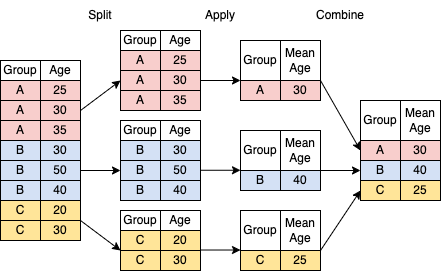

Let's show how we can use a `groupby` operation to get the average net worth by country:

In [6]:
rich.groupby("Country").mean()["Net Worth"]

Country
Algeria           5.100000
Argentina         2.333333
Australia         4.655814
Austria           5.609091
Barbados          1.700000
                    ...   
United Kingdom    3.728261
United States     6.562990
Uruguay           1.500000
Venezuela         3.500000
Vietnam           2.500000
Name: Net Worth, Length: 74, dtype: float64

We can also sort this series to eyeball what the top 5 countries are.

In [7]:
rich.groupby("Country").mean()["Net Worth"].sort_values(ascending=False)

Country
France           12.817500
Nigeria           9.400000
United States     6.562990
Ireland           6.085714
Colombia          6.025000
                   ...    
Slovakia          1.500000
Uruguay           1.500000
Nepal             1.500000
Hungary           1.250000
Estonia           1.200000
Name: Net Worth, Length: 74, dtype: float64

Once we do a `groupby` operation in Pandas, we can easily do other aggregating operations. 

In [8]:
country_groups = rich.groupby("Country")["Net Worth"]

# Get standard deviation for each country
country_stds = country_groups.std()

# Get the number of rows for each country
country_counts = country_groups.count()

# Can do custom aggregation functions using 
# e.g. get mean logarithm net worth
country_mean_log_net_worth = country_groups.apply(lambda x: np.log(x).mean())

It's also possible to group by more than 1 column. For example, if we wanted to get the mean net worth for individuals from the same country and industry, we could do 

In [9]:
# Now group by symbol and month
rich.groupby(["Industry", "Country"]).mean()["Net Worth"]

Industry    Country       
Automotive  Australia          2.600000
            Austria            1.200000
            China              7.358824
            Germany            7.700000
            Hong Kong         18.700000
                                ...    
Telecom     Russia             1.450000
            South Korea        2.400000
            Turkey             1.100000
            United Kingdom     2.150000
            United States      2.875000
Name: Net Worth, Length: 440, dtype: float64

**Exercise**
* Calculate the average age of wealthy individuals from each industry. 
* Count the number of wealthy individuals in each industry.
* Find the top 5 countries with the greatest total net worth. 
* *Challenge* : Find the difference in net worth between the most wealthy and second most wealthy person in each industry. 

### **Joining and Merging**

Often it is useful to combine multiple dataframes into one dataframe. Luckily there are several ways to do this in Pandas. Let's start with the following 3 dataframes.

In [10]:
df1 = pd.DataFrame({
    "A": [0, 1, 2],
    "B": [3, 4, 5],
    "C": [6, 7, 8],
})
df2 = pd.DataFrame({
    "D": ["a", "b", "c"],
    "E": ["d", "e", "f"],
    "F": ["g", "h", "i"],
})
df3 = pd.DataFrame({
    "A": [2, 0, -2],
    "D": [-1, -2, -3]
})

The most straightforward way to combine dataframes in pandas is to concatenate them using `pd.concat`. Concatenation can happen *vertically*, i.e. stacking dataframes on top of each other, or *horizontally*, i.e. combining side-by-side. We can see this in action with our test dataframes above. 

In [11]:
# Vertically stack df1 and (df1 + 3)
print("Vertical stack")
print(pd.concat([df1, df1 + 3], axis=0))

# Horizontally stack df1 and df2
print("\nHorizontal Stack")
print(pd.concat([df1, df2], axis=1))

Vertical stack
   A  B   C
0  0  3   6
1  1  4   7
2  2  5   8
0  3  6   9
1  4  7  10
2  5  8  11

Horizontal Stack
   A  B  C  D  E  F
0  0  3  6  a  d  g
1  1  4  7  b  e  h
2  2  5  8  c  f  i


Notice the difference in the code for vertical and horizontal stacking: the use of the `axis` parameter. In general in Pandas, *axis 0 goes across rows, and axis 1 goes across columns*. Thus, we use `pd.concat(dfs, axis=0)` to concatenate rows, i.e. concatenate vertically, and `pd.concat(dfs, axis=1)` to concatenate columns, i.e. concatenate horizontally.

Sometimes, though, we want to do more than simply concatenate. Specifically, we sometimes want to *join* the dataframes based on the value of one or more columns such as in the image below. 

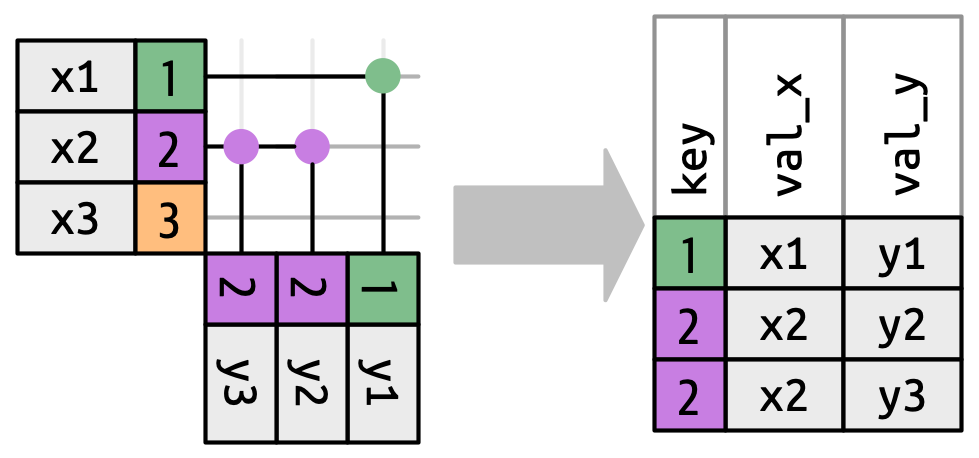

Let's see an example of joining `df1` and `df3` on the "A" column: 

In [12]:
pd.merge(df1, df3, on="A")

,A,B,C,D
0,0,3,6,-2
1,2,5,8,-1


Notice that `pd.merge` found rows in `df1` and `df3` where A=2 and A=0, and matched these rows together. One row in each original dataframe, however, was dropped because there was no matching row in the other dataframe. This behavior occured because of the type of join we performed.

There are 4 typical types of joins:

- **Inner**: keep rows where the ID columns are matched in both dataframes. This is the default in `pd.merge` and what was done in the above example.
- **Left**: includes all rows from inner join, but also includes rows from the "left" (first) dataframe that do not have matches. These unmatched rows are filled with NAs for all columns from the right dataframe.
- **Right**: same as left join, but reversing the role of the left (first) and right (second) dataframes.
- **Outer**: keep all rows from both dataframes, replacing with NAs where needed.

![](https://media.geeksforgeeks.org/wp-content/uploads/joinimages.png)

Controlling the type of join is easy to do using the `how` parameter in `pd.merge`. Some examples are below:

In [13]:
print("Inner Join")
print(pd.merge(df1, df3, on="A", how="inner"))

print("\nLeft Join")
print(pd.merge(df1, df3, on="A", how="left"))

print("\nRight Join")
print(pd.merge(df1, df3, on="A", how="right"))

print("\nOuter Join")
print(pd.merge(df1, df3, on="A", how="outer"))

Inner Join
   A  B  C  D
0  0  3  6 -2
1  2  5  8 -1

Left Join
   A  B  C    D
0  0  3  6 -2.0
1  1  4  7  NaN
2  2  5  8 -1.0

Right Join
   A    B    C  D
0  2  5.0  8.0 -1
1  0  3.0  6.0 -2
2 -2  NaN  NaN -3

Outer Join
   A    B    C    D
0  0  3.0  6.0 -2.0
1  1  4.0  7.0  NaN
2  2  5.0  8.0 -1.0
3 -2  NaN  NaN -3.0


**EXERCISE** Let's say we're interested in joining the iso country code onto our `rich` dataset. Create a new version of the `rich` dataset with the `Alpha-2 code` column from `iso_codes` joined onto it. Think carefully about which type of join would be most appropriate.

Hint: The resulting dataset should be of shape (2509, 8).

In [14]:
# Import data to get you started
iso_codes = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/data/wikipedia-iso-country-codes.csv")
iso_codes = iso_codes.rename(columns={"English short name lower case":"Country"})

### **Sampling**

We're now going to switch gears and talk about sampling. Sampling is an extremely important tool for any statistician, and is the workhorse of several very important data science topics including [Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method#:~:text=Monte%20Carlo%20methods%2C%20or%20Monte,might%20be%20deterministic%20in%20principle.), [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)), and [numerical linear algebra](https://en.wikipedia.org/wiki/Numerical_linear_algebra). *Sampling* can be defined as the process of collecting a random set of observations from some population. What the population is that we are sampling from is most crucial. 

Let's start by looking at the function `pd.sample`, which is used to draw samples from a user-defined fixed population.

In [15]:
# Generate an array from 0 to 4
l = pd.DataFrame({
    "x": list(range(5))
})

print("Draw 2 random samples from l")
print(l.sample(n=2, random_state=10))

print("\nDraw 10 random samples with replacement from l")
print(l.sample(n=10, replace=True, random_state=10))

print("\nDraw 5 random samples with replacement and with unequal probabilities from l")
l["p"] = [0.8, 0.05, 0.05, 0.05, 0.05]
print(l.sample(n=10, replace=True, weights="p", random_state=10))

Draw 2 random samples from l
   x
2  2
3  3

Draw 10 random samples with replacement from l
   x
1  1
4  4
0  0
1  1
3  3
4  4
1  1
0  0
1  1
2  2

Draw 5 random samples with replacement and with unequal probabilities from l
   x    p
0  0  0.8
0  0  0.8
0  0  0.8
0  0  0.8
0  0  0.8
0  0  0.8
0  0  0.8
0  0  0.8
0  0  0.8
0  0  0.8


The other most common type of sampling is sampling from known probability distributions. This is very easy to do using NumPy. Here are a few examples of drawing from common probability distributions using `np.random`:

In [16]:
# Set seed to ensure reproducible results. This performs the same role as the `random_state` argument in `pd.sample`
np.random.seed(10)

print("Samples from the standard Normal distribution")
print(np.random.normal(size=5))

print("\nSamples from a Normal distribution with mean -2 and standard deviation 3")
print(np.random.normal(loc=-2, scale=3, size=5))

print("\nSamples from a Binomial distribution with n=10, p=0.5")
print(np.random.binomial(n=10, p=0.5, size=5))

# Use binomial function to sample Bernoulli as well
print("\nSamples from a Bernoulli distribution with p=0.5")
print(np.random.binomial(n=1, p=0.5, size=5))

Samples from the standard Normal distribution
[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597]

Samples from a Normal distribution with mean -2 and standard deviation 3
[-4.16025668 -1.20346524 -1.67435442 -1.98712571 -2.52380063]

Samples from a Binomial distribution with n=10, p=0.5
[6 5 6 4 7]

Samples from a Bernoulli distribution with p=0.5
[1 1 0 0 1]


**EXERCISE** 

- Randomly sample 10 wealthy individuals without replacement from the `rich` dataset. Print out the mean of these individuals.
- Do the above 1000 times, which time storing the mean of the 10 selected individuals.
- Make a plot to visualize the distribution of the 1000 means.